## Feature Selection Methods

In [1]:
# Univariate Selection
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df = pd.read_csv("Input.csv")
X = df.iloc[:,2:19]  #select all the feature columns
y = df.iloc[:,-1]    #select the target


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


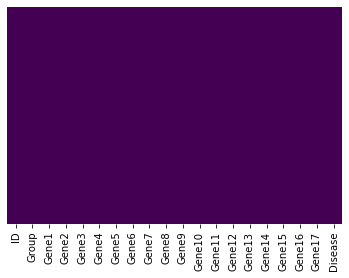

In [3]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

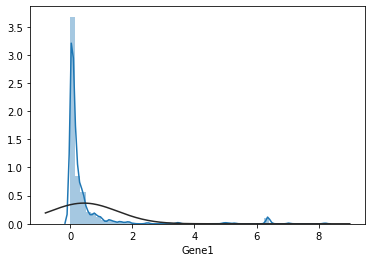

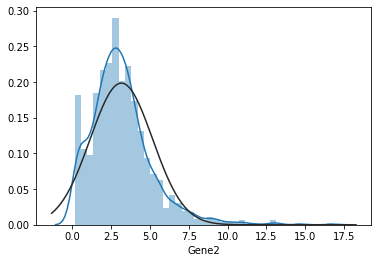

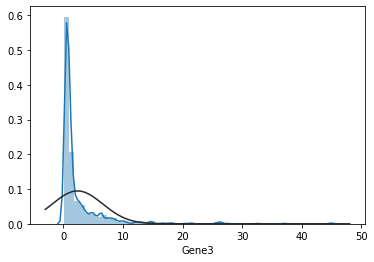

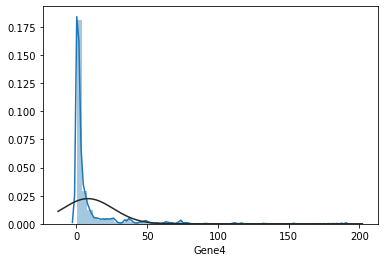

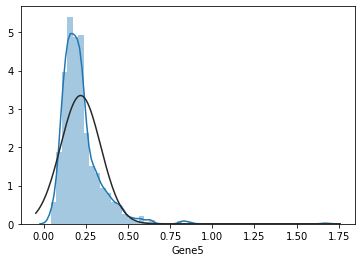

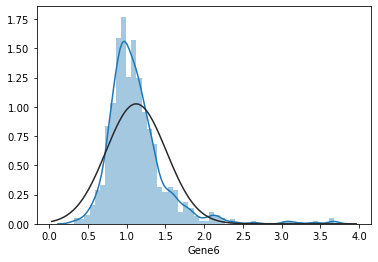

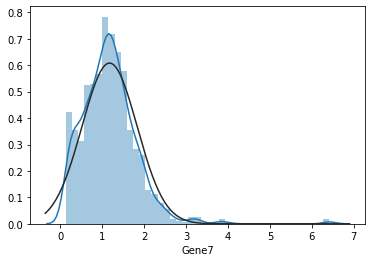

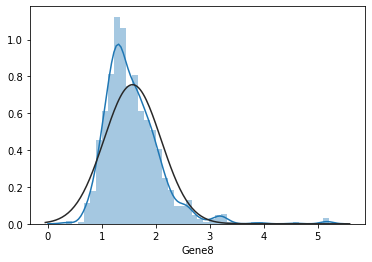

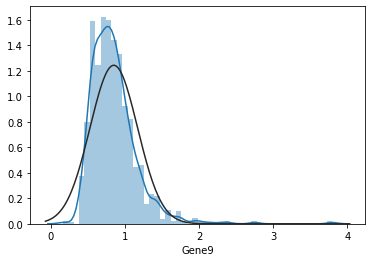

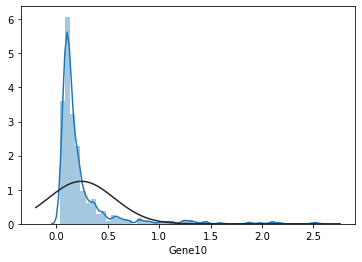

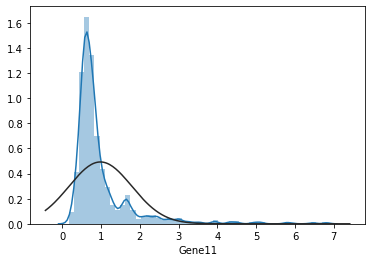

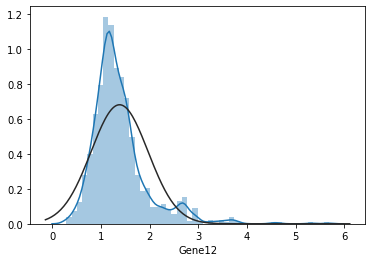

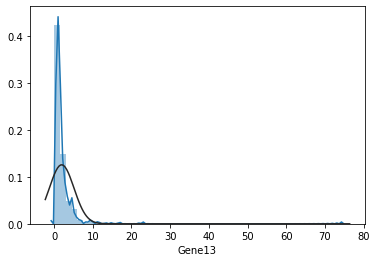

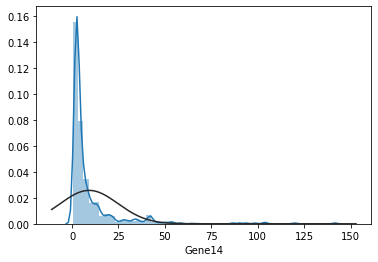

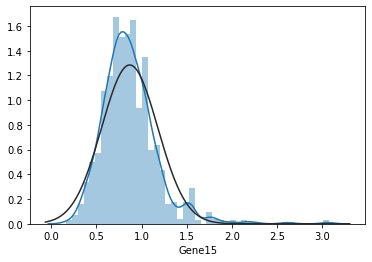

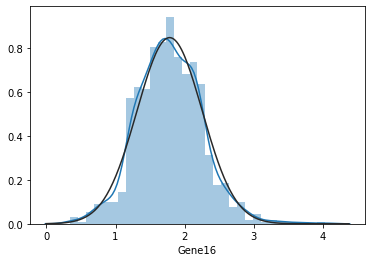

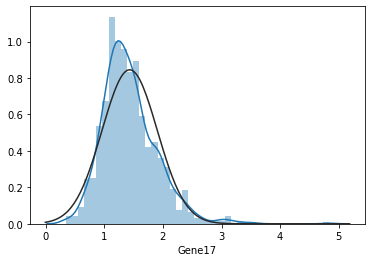

<Figure size 432x288 with 0 Axes>

In [4]:
features = X.columns
for i in features:
    sns.distplot(X[i], fit=norm);
    fig = plt.figure()
#     res = stats.probplot(X[i], plot=plt)

In [5]:
#skewness and kurtosis

features = X.columns
for i in features:
    print(i + " "+ "Skewness: %f" % X[i].skew())
    print(i +" "+ "Kurtosis: %f" % X[i].kurt())

Gene1 Skewness: 4.737284
Gene1 Kurtosis: 23.269778
Gene2 Skewness: 1.547123
Gene2 Kurtosis: 5.067577
Gene3 Skewness: 4.828881
Gene3 Kurtosis: 32.158157
Gene4 Skewness: 4.147722
Gene4 Kurtosis: 23.011427
Gene5 Skewness: 3.091567
Gene5 Kurtosis: 23.035489
Gene6 Skewness: 2.476980
Gene6 Kurtosis: 11.065075
Gene7 Skewness: 1.852084
Gene7 Kurtosis: 10.784811
Gene8 Skewness: 1.999136
Gene8 Kurtosis: 8.823144
Gene9 Skewness: 2.633185
Gene9 Kurtosis: 15.718306
Gene10 Skewness: 3.833846
Gene10 Kurtosis: 17.393458
Gene11 Skewness: 3.457183
Gene11 Kurtosis: 15.497034
Gene12 Skewness: 2.036245
Gene12 Kurtosis: 7.356916
Gene13 Skewness: 12.115246
Gene13 Kurtosis: 241.635807
Gene14 Skewness: 4.291359
Gene14 Kurtosis: 23.567297
Gene15 Skewness: 1.644381
Gene15 Kurtosis: 6.897943
Gene16 Skewness: 0.292020
Gene16 Kurtosis: 0.984491
Gene17 Skewness: 1.135713
Gene17 Kurtosis: 3.554255


In [6]:
#applying log transformation

features = X.columns
for i in features:
    X[i] = np.log(X[i])

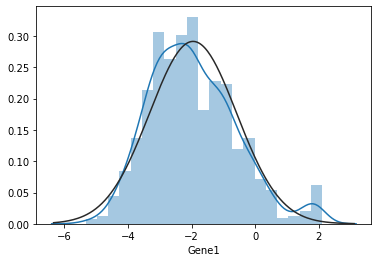

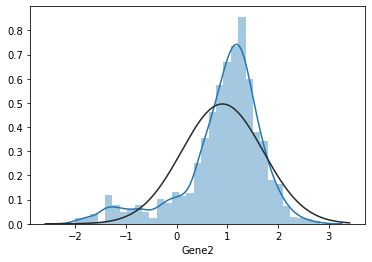

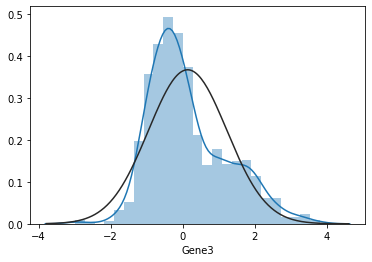

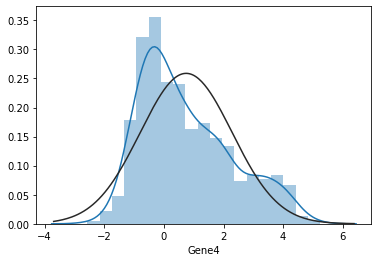

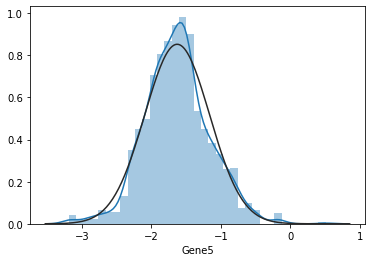

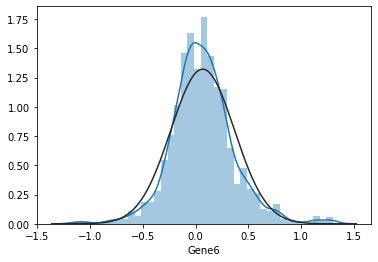

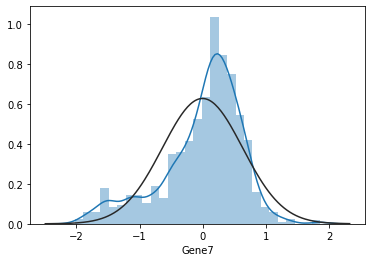

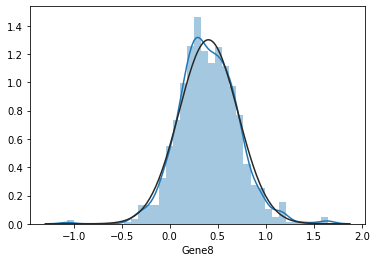

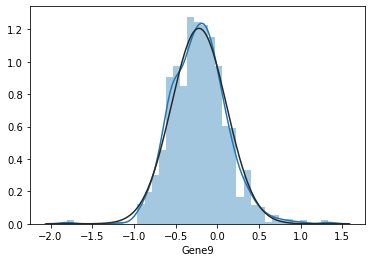

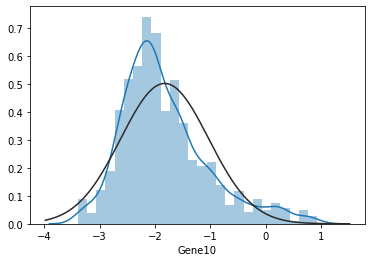

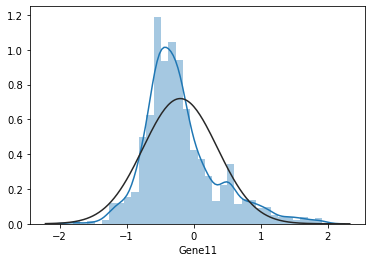

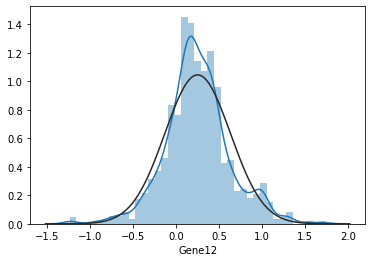

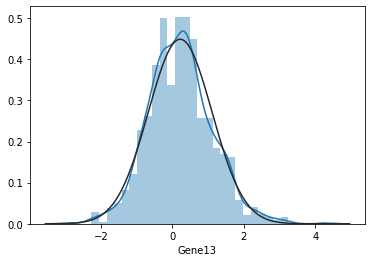

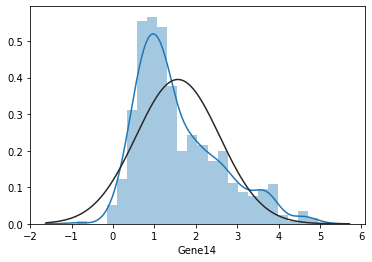

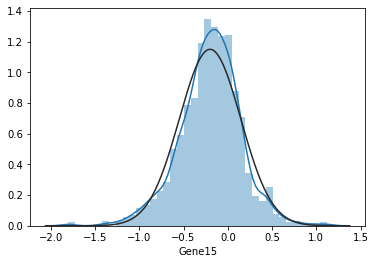

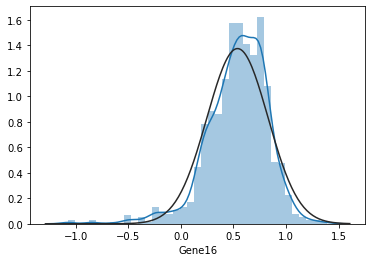

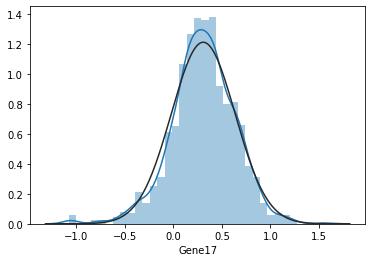

<Figure size 432x288 with 0 Axes>

In [7]:
features = X.columns
for i in features:
    sns.distplot(X[i], fit=norm);
    fig = plt.figure()

In [8]:
#skewness and kurtosis

features = X.columns
for i in features:
    print(i + " "+ "Skewness: %f" % X[i].skew())
    print(i +" "+ "Kurtosis: %f" % X[i].kurt())

Gene1 Skewness: 0.557137
Gene1 Kurtosis: 0.235075
Gene2 Skewness: -1.245234
Gene2 Kurtosis: 1.795820
Gene3 Skewness: 0.753999
Gene3 Kurtosis: 0.222707
Gene4 Skewness: 0.681469
Gene4 Kurtosis: -0.354364
Gene5 Skewness: 0.124153
Gene5 Kurtosis: 0.839669
Gene6 Skewness: 0.390682
Gene6 Kurtosis: 2.262017
Gene7 Skewness: -0.883920
Gene7 Kurtosis: 0.697931
Gene8 Skewness: 0.183680
Gene8 Kurtosis: 1.493759
Gene9 Skewness: 0.287450
Gene9 Kurtosis: 1.640425
Gene10 Skewness: 0.997879
Gene10 Kurtosis: 1.056080
Gene11 Skewness: 1.030467
Gene11 Kurtosis: 1.512353
Gene12 Skewness: 0.102608
Gene12 Kurtosis: 1.383452
Gene13 Skewness: 0.273849
Gene13 Kurtosis: 0.653797
Gene14 Skewness: 0.935953
Gene14 Kurtosis: 0.348021
Gene15 Skewness: -0.280246
Gene15 Kurtosis: 1.472390
Gene16 Skewness: -1.044874
Gene16 Kurtosis: 3.102817
Gene17 Skewness: -0.349356
Gene17 Kurtosis: 1.302648


In [9]:
# Fitting a baseline Logistic regression Model
lr = LogisticRegression()      
lr_model = lr.fit(X,y)

rfecv = RFECV(estimator=lr, scoring='accuracy')
rfecv = rfecv.fit(X,y)



In [10]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

Optimal number of features : 17
Best features : Index(['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5', 'Gene6', 'Gene7', 'Gene8',
       'Gene9', 'Gene10', 'Gene11', 'Gene12', 'Gene13', 'Gene14', 'Gene15',
       'Gene16', 'Gene17'],
      dtype='object')


In [11]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X, y)
print("Score: ", logistic.score(X, y))

Score:  0.811453744493392


In [12]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
print(model.feature_importances_)

[0.09633619 0.04296625 0.11589872 0.06008538 0.04451271 0.04228088
 0.11361169 0.03817733 0.03747265 0.05956554 0.04183463 0.03391189
 0.05533303 0.07487934 0.07861281 0.0237061  0.04081488]


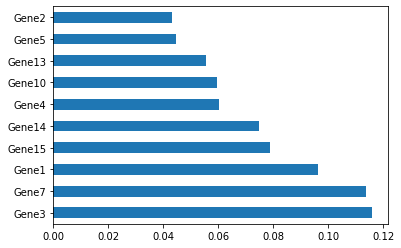

In [14]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [15]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X,y)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [16]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-0.1894681423513651


In [17]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,2,3,4,5,10,15,20]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=10)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-0.18946814235136689


In [18]:

prediction_lasso=lasso_regressor.predict(X)
prediction_ridge=ridge_regressor.predict(X)

In [19]:
# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [20]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.07786052 0.06567181 0.10972577 0.05162842 0.05501707 0.04484356
 0.08270092 0.05074674 0.04092581 0.05199963 0.04472272 0.06062874
 0.052947   0.06743854 0.06749816 0.03693644 0.03870815]


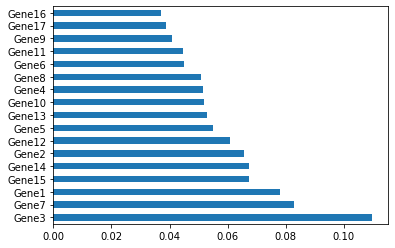

In [21]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [22]:
feat_importances.nlargest(10)

Gene3     0.109726
Gene7     0.082701
Gene1     0.077861
Gene15    0.067498
Gene14    0.067439
Gene2     0.065672
Gene12    0.060629
Gene5     0.055017
Gene13    0.052947
Gene10    0.052000
dtype: float64

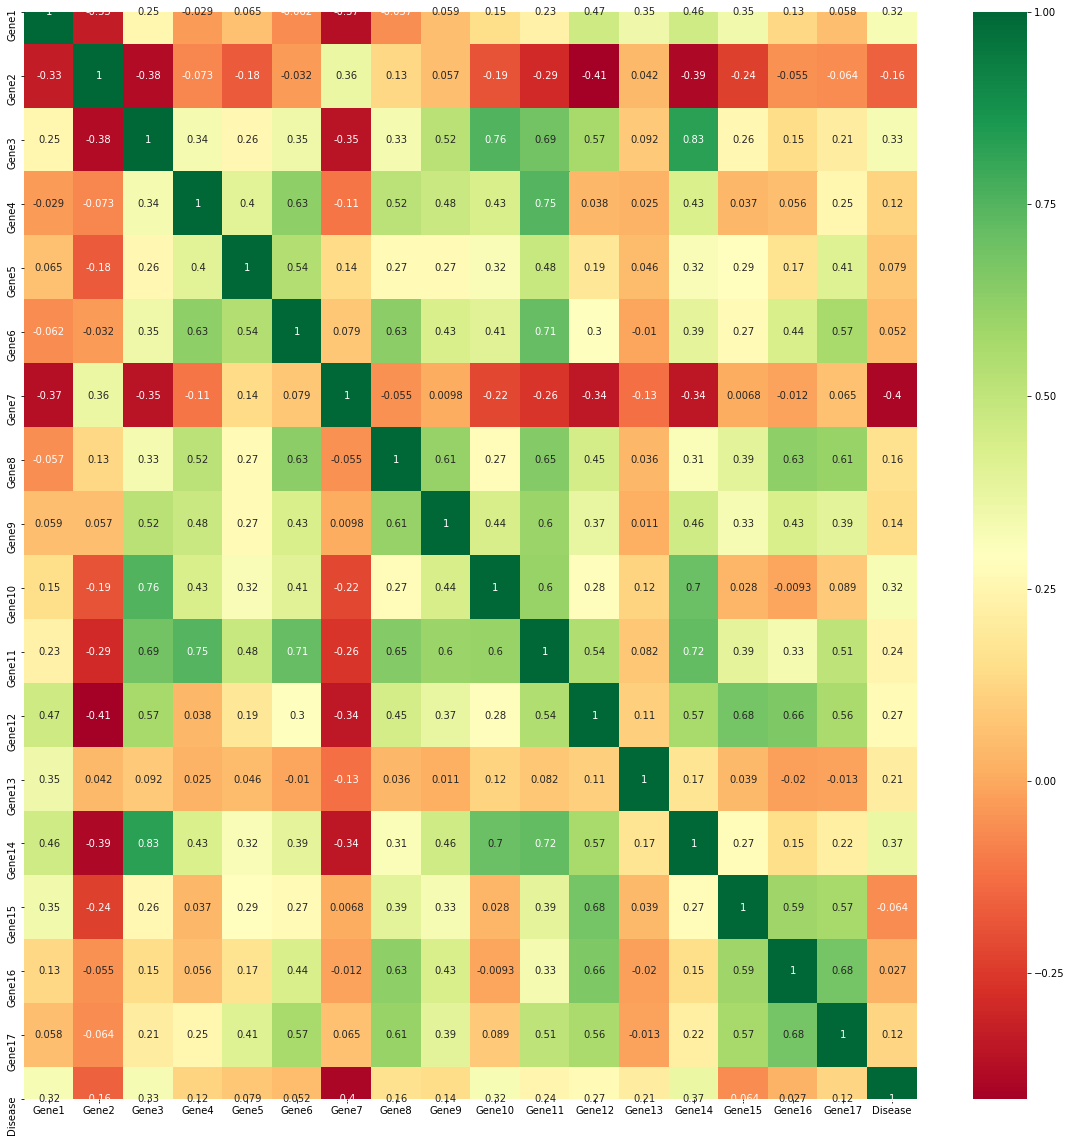

In [23]:

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

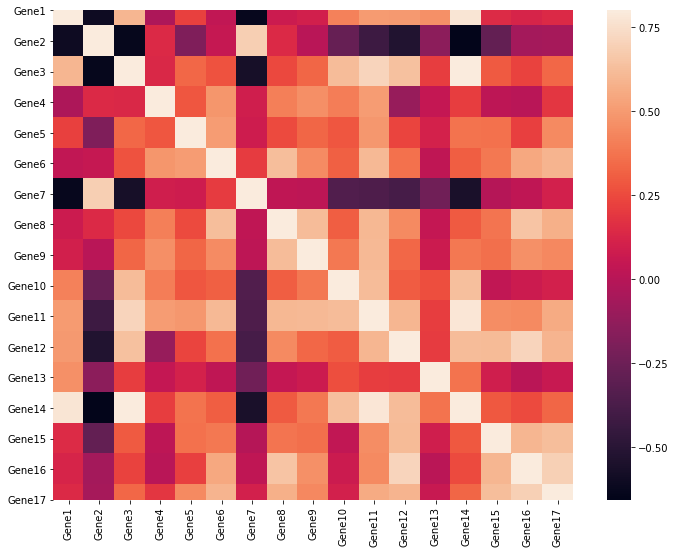

In [24]:
#correlation matrix
corrmat = X.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [26]:
clf_lr = LogisticRegression()      
lr_baseline_model = clf_lr.fit(X,y)

rfecv = RFECV(estimator=clf_lr, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X,y)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])


Optimal number of features : 16
Best features : Index(['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5', 'Gene6', 'Gene7', 'Gene8',
       'Gene9', 'Gene10', 'Gene11', 'Gene12', 'Gene13', 'Gene15', 'Gene16',
       'Gene17'],
      dtype='object')


In [27]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

Optimal number of features : 16
Best features : Index(['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5', 'Gene6', 'Gene7', 'Gene8',
       'Gene9', 'Gene10', 'Gene11', 'Gene12', 'Gene13', 'Gene15', 'Gene16',
       'Gene17'],
      dtype='object')


In [28]:
rfecv.grid_scores_

array([0.64134602, 0.6961393 , 0.74285531, 0.72251309, 0.71633776,
       0.74467953, 0.73673442, 0.74555292, 0.75253938, 0.76930693,
       0.7648588 , 0.76748258, 0.77188797, 0.76842964, 0.77279231,
       0.77368503, 0.77368503])

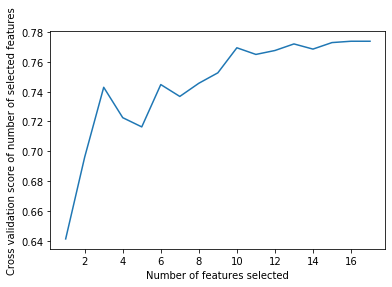

In [29]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [30]:
def generate_accuracy_and_heatmap(model, X, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(X))
    f_score = f1_score(y,model.predict(X))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
#    
    return 1

In [31]:
x_train_rfecv = rfecv.transform(X)

lr_rfecv_model = clf_lr.fit(x_train_rfecv, y)
generate_accuracy_and_heatmap(lr_rfecv_model, x_train_rfecv, y)

Accuracy is:  0.8193832599118943
F1 score is:  0.7651775486827035




1